In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [50]:

consumers = pd.read_csv('Cleaned datasets/cleaned_consumers.csv')
preferences = pd.read_csv('dataset/consumer_preferences.csv')
restaurants = pd.read_csv('Cleaned datasets/cleaned_resturant.csv')
cuisines = pd.read_csv('dataset/restaurant_cuisines.csv')
ratings = pd.read_csv('dataset/ratings.csv')


In [51]:
# Merge consumers and preferences
consumer_pref = pd.merge(consumers, preferences, on='Consumer_ID')

# Merge consumer_pref with ratings
consumer_ratings = pd.merge(consumer_pref, ratings, on='Consumer_ID')

# Merge cuisines with restaurants
restaurant_data = pd.merge(cuisines, restaurants, on='Restaurant_ID')

# Match Preferred_Cuisine with Cuisine and merge with consumer_ratings
recommendation_data = pd.merge(
    consumer_ratings,
    restaurant_data,
    left_on=['Preferred_Cuisine'],
    right_on=['Cuisine']
)


In [52]:
recommendation_data

,Consumer_ID,City_x,State_x,Country_x,Latitude_x,Longitude_x,Smoker,Drink_Level,Transportation_Method,Marital_Status,...,State_y,Country_y,Latitude_y,Longitude_y,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking
0,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,...,Morelos,Mexico,18.922290,-99.234332,No Service,No,Low,Yes,Closed,No
1,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,...,San Luis Potosi,Mexico,22.136872,-100.934574,No Service,No,Low,No,Closed,Yes
2,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,...,San Luis Potosi,Mexico,22.173596,-100.994603,No Service,No,Medium,No,Closed,Public
3,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,...,San Luis Potosi,Mexico,22.154474,-100.985809,No Service,No,Low,No,Closed,Yes
4,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,...,San Luis Potosi,Mexico,22.144979,-101.005683,No Service,No,Low,Yes,Closed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,...,Morelos,Mexico,18.882087,-99.163027,Wine & Beer,Yes,Medium,No,Open,Yes
27476,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,...,Morelos,Mexico,18.882087,-99.163027,Wine & Beer,Yes,Medium,No,Open,Yes
27477,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,...,Morelos,Mexico,18.882087,-99.163027,Wine & Beer,Yes,Medium,No,Open,Yes
27478,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,...,Morelos,Mexico,18.882087,-99.163027,Wine & Beer,Yes,Medium,No,Open,Yes


In [53]:
recommendation_data.isna().sum()

Consumer_ID              0
City_x                   0
State_x                  0
Country_x                0
Latitude_x               0
Longitude_x              0
Smoker                   0
Drink_Level              0
Transportation_Method    0
Marital_Status           0
Children                 0
Age                      0
Occupation               0
Budget                   0
Preferred_Cuisine        0
Restaurant_ID_x          0
Overall_Rating           0
Food_Rating              0
Service_Rating           0
Restaurant_ID_y          0
Cuisine                  0
Name                     0
City_y                   0
State_y                  0
Country_y                0
Latitude_y               0
Longitude_y              0
Alcohol_Service          0
Smoking_Allowed          0
Price                    0
Franchise                0
Area                     0
Parking                  0
dtype: int64

In [54]:
recommendation_data.describe()

,Latitude_x,Longitude_x,Age,Restaurant_ID_x,Overall_Rating,Food_Rating,Service_Rating,Restaurant_ID_y,Latitude_y,Longitude_y
count,27480.000000,27480.000000,27480.000000,27480.000000,27480.000000,27480.000000,27480.000000,27480.000000,27480.000000,27480.000000
mean,22.002665,-100.542108,26.254367,134184.786426,1.136718,1.158006,1.048508,133479.077911,22.405085,-100.036926
std,1.197343,0.763499,13.119513,1103.943114,0.801336,0.813160,0.803716,1087.782211,1.494367,0.904216
min,18.839671,-101.054680,18.000000,132560.000000,0.000000,0.000000,0.000000,132560.000000,18.859803,-101.028600
25%,22.142748,-100.984268,21.000000,132854.000000,0.000000,0.000000,0.000000,132668.000000,22.147145,-100.983092
50%,22.151796,-100.949936,23.000000,135032.000000,1.000000,1.000000,1.000000,132773.000000,22.153324,-99.227110
75%,22.177726,-100.904279,24.000000,135060.000000,2.000000,2.000000,2.000000,135025.000000,23.752168,-99.165288
max,23.758815,-99.067106,82.000000,135109.000000,2.000000,2.000000,2.000000,135109.000000,23.760268,-99.132357


In [55]:
recommendation_data['Parking'].value_counts()

Parking
No        15021
Yes        6674
Public     5697
Valet        88
Name: count, dtype: int64

In [56]:
recommendation_data['Parking'] = recommendation_data['Parking'].replace('Valet','Public')

In [57]:
recommendation_data['Parking'].value_counts()

Parking
No        15021
Yes        6674
Public     5785
Name: count, dtype: int64

In [58]:
recommendation_data['Cuisine'].value_counts()

Cuisine
Mexican          23268
Cafeteria          765
American           510
Bar                429
Fast Food          400
Japanese           370
Pizzeria           305
Italian            272
Burgers            245
Family             160
Chinese            144
Seafood            120
Contemporary       102
Brewery             84
Coffee Shop         79
International       56
Regional            41
Breakfast           32
Game                30
Bakery              26
Mediterranean       14
Armenian            14
Vietnamese          14
Name: count, dtype: int64

In [59]:
cuisine_counts = recommendation_data['Cuisine'].value_counts()
recommendation_data['Cuisine'] = recommendation_data['Cuisine'].apply(lambda x: 'Mixed' if cuisine_counts[x]  < 200 else x)

In [60]:
recommendation_data['Cuisine'].value_counts()

Cuisine
Mexican      23268
Mixed          916
Cafeteria      765
American       510
Bar            429
Fast Food      400
Japanese       370
Pizzeria       305
Italian        272
Burgers        245
Name: count, dtype: int64

In [61]:
recommendation_data['City_y'].value_counts()

City_y
San Luis Potosi    13116
Ciudad Victoria    11087
Cuernavaca          3230
Jiutepec              47
Name: count, dtype: int64

In [62]:
recommendation_data = recommendation_data[recommendation_data['City_y'] != 'Jiutepec']

In [63]:
recommendation_data['City_y'].value_counts()

City_y
San Luis Potosi    13116
Ciudad Victoria    11087
Cuernavaca          3230
Name: count, dtype: int64

In [64]:
recommendation_data.shape

(27433, 33)

In [65]:
dup= recommendation_data.duplicated()
dup

0        False
1        False
2        False
3        False
4        False
         ...  
27461    False
27462    False
27463    False
27464    False
27465    False
Length: 27433, dtype: bool

In [66]:
unique_df = recommendation_data.drop_duplicates()
display(unique_df)

,Consumer_ID,City_x,State_x,Country_x,Latitude_x,Longitude_x,Smoker,Drink_Level,Transportation_Method,Marital_Status,...,State_y,Country_y,Latitude_y,Longitude_y,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking
0,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,...,Morelos,Mexico,18.922290,-99.234332,No Service,No,Low,Yes,Closed,No
1,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,...,San Luis Potosi,Mexico,22.136872,-100.934574,No Service,No,Low,No,Closed,Yes
2,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,...,San Luis Potosi,Mexico,22.173596,-100.994603,No Service,No,Medium,No,Closed,Public
3,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,...,San Luis Potosi,Mexico,22.154474,-100.985809,No Service,No,Low,No,Closed,Yes
4,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,...,San Luis Potosi,Mexico,22.144979,-101.005683,No Service,No,Low,Yes,Closed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27461,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,...,Morelos,Mexico,18.948657,-99.235361,Full Bar,Smoking Section,High,No,Closed,Yes
27462,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,...,San Luis Potosi,Mexico,22.148665,-101.001273,Full Bar,No,High,No,Closed,No
27463,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,...,San Luis Potosi,Mexico,22.150981,-100.977412,Full Bar,No,High,No,Closed,No
27464,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,...,San Luis Potosi,Mexico,22.126375,-100.910926,Full Bar,Smoking Section,Medium,No,Closed,Yes


In [67]:
print(recommendation_data.columns)  # Check available columns



Index(['Consumer_ID', 'City_x', 'State_x', 'Country_x', 'Latitude_x',
       'Longitude_x', 'Smoker', 'Drink_Level', 'Transportation_Method',
       'Marital_Status', 'Children', 'Age', 'Occupation', 'Budget',
       'Preferred_Cuisine', 'Restaurant_ID_x', 'Overall_Rating', 'Food_Rating',
       'Service_Rating', 'Restaurant_ID_y', 'Cuisine', 'Name', 'City_y',
       'State_y', 'Country_y', 'Latitude_y', 'Longitude_y', 'Alcohol_Service',
       'Smoking_Allowed', 'Price', 'Franchise', 'Area', 'Parking'],
      dtype='object')


In [68]:
# Rename columns to avoid ambiguity
recommendation_data = recommendation_data.rename(
    columns={
        'Restaurant_ID_x': 'Consumer_Restaurant_ID',
        'Restaurant_ID_y': 'Restaurant_ID',
        'City_x': 'Consumer_City',
        'City_y': 'Restaurant_City',
        'Name': 'Restaurant_Name'
    }
)

# Select required columns
recommendation_data = recommendation_data[[
    'Consumer_ID', 'Preferred_Cuisine', 'Restaurant_ID', 'Restaurant_Name',
    'Cuisine', 'Consumer_City', 'Restaurant_City', 'Price','Alcohol_Service','Parking',
    'Overall_Rating', 'Food_Rating', 'Service_Rating'
]]

# Drop rows with missing values
recommendation_data.dropna(inplace=True)

# Preview the cleaned DataFrame
recommendation_data.head()


,Consumer_ID,Preferred_Cuisine,Restaurant_ID,Restaurant_Name,Cuisine,Consumer_City,Restaurant_City,Price,Alcohol_Service,Parking,Overall_Rating,Food_Rating,Service_Rating
0,U1001,American,132583,McDonalds Centro,American,San Luis Potosi,Cuernavaca,Low,No Service,No,1,1,1
1,U1001,American,132851,KFC,American,San Luis Potosi,San Luis Potosi,Low,No Service,Yes,1,1,1
2,U1001,American,132872,Pizzeria Julios,American,San Luis Potosi,San Luis Potosi,Medium,No Service,Public,1,1,1
3,U1001,American,132951,Vips,American,San Luis Potosi,San Luis Potosi,Low,No Service,Yes,1,1,1
4,U1001,American,132958,Tacos Los Volcanes,American,San Luis Potosi,San Luis Potosi,Low,No Service,No,1,1,1


In [69]:
recommendation_data.shape

(27433, 13)

In [78]:
recommendation_data.to_csv('recommendation_data.csv', index=False)


<Axes: xlabel='Price', ylabel='Count'>

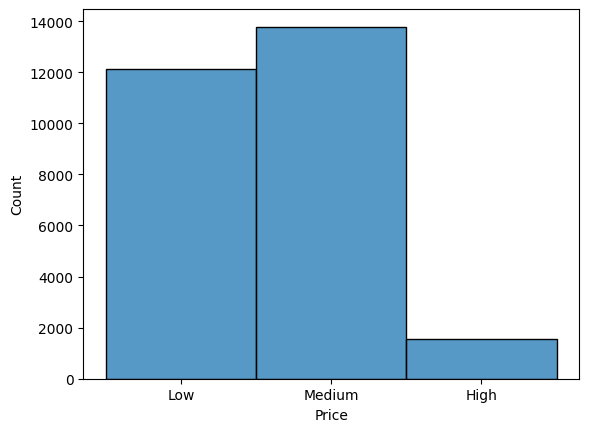

In [77]:
sns.histplot(data = recommendation_data[['Price']] , x = "Price")